In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Moving Average Recursive

### Hyperparameters

In [19]:
df = pd.read_csv("../results/tuning/moving_average_recursive.csv", sep=";")
metric = "F1-Score"
assert check_normality(df[metric])

#### Min-Max Normalization

Significant group difference: False
Normalization
0    47
1    49
Name: F1-Score, dtype: int64


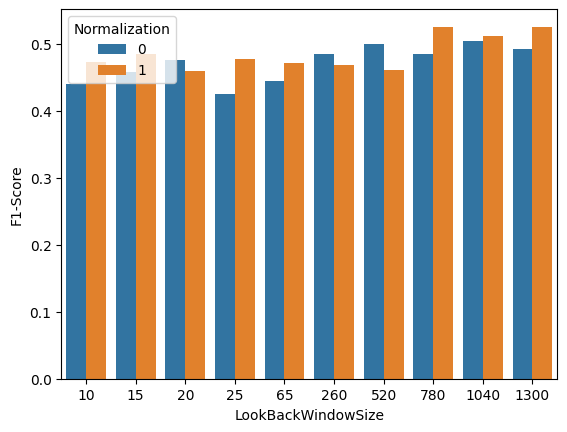

In [20]:
assert check_homoscedasticity(*[df[df["Normalization"]==val][metric] for val in df["Normalization"].unique()])
print("Significant group difference:", check_group_difference(df[df["Normalization"]==True][metric], df[df["Normalization"]==False][metric]))
print(round(df.groupby("Normalization")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, hue="Normalization", data=df);

#### Look Back Window Size

LookBackWindowSize
10      46
15      47
20      47
25      45
65      46
260     48
520     48
780     51
1040    51
1300    51
Name: F1-Score, dtype: int64


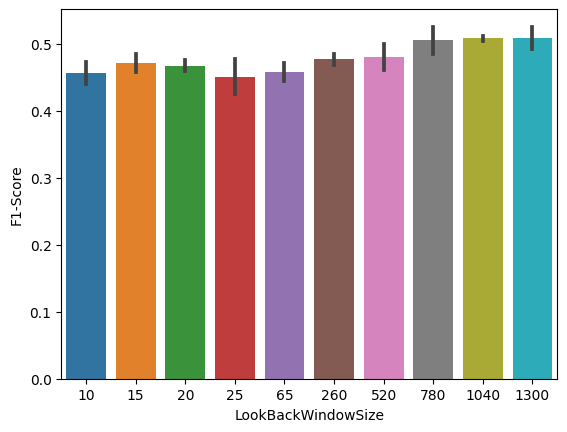

In [21]:
print(round(df.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, data=df);

Significant group difference: True


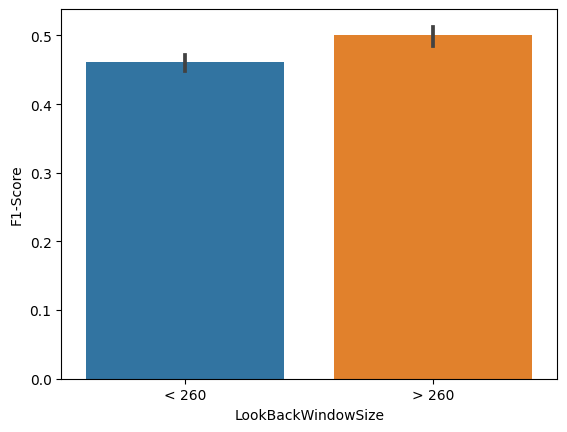

In [25]:
lbws_under_one_year = df[df["LookBackWindowSize"] < 260].copy()
lbws_over_one_year = df[df["LookBackWindowSize"] > 260].copy()
assert check_homoscedasticity(lbws_under_one_year[metric], lbws_over_one_year[metric])
print("Significant group difference:", check_group_difference(lbws_under_one_year[metric], lbws_over_one_year[metric]))
lbws_under_one_year["LookBackWindowSize"] = "< 260"
lbws_over_one_year["LookBackWindowSize"] = "> 260"
sns.barplot(x="LookBackWindowSize", y=metric, data=pd.concat([lbws_under_one_year, lbws_over_one_year]));

### Conclusion
- Normalization (on vs off) does not significantly affect F1 scores.
- The Look Back Window Size makes a significant difference: >1 year is better than <1 year.